In [1]:
%matplotlib inline

import os
import helper
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Corrupted by Pessimism

### Pulgas Water Temple
![](https://offloadmedia.feverup.com/secretsanfrancisco.com/wp-content/uploads/2021/12/03043857/leo-korman-bw2kascwquu-unsplas.jpg)

### California Reservoir Capacity
Data from [here](https://andthewest.stanford.edu/2022/does-drought-prone-california-need-another-reservoir/)

In [2]:
california_reservoir_capacity = pd.read_csv("../raw_data/individual/california_reservoir_capacity.txt")

california_reservoir_capacity = california_reservoir_capacity[~california_reservoir_capacity.Year.isna()].reset_index(drop=True)
california_reservoir_capacity = california_reservoir_capacity[california_reservoir_capacity.Year != "Proposed"]
california_reservoir_capacity.Year = pd.to_numeric(california_reservoir_capacity.Year)

california_reservoir_capacity = california_reservoir_capacity.sort_values(by="Year")
cum_sum = california_reservoir_capacity[["Year", "Capacity"]].groupby("Year").sum().cumsum().reset_index()
cum_sum.loc[-1] = [2024, cum_sum.iloc[-1].Capacity]

# Convert to Millions of Acre feet
cum_sum.Capacity /= 1_000_000

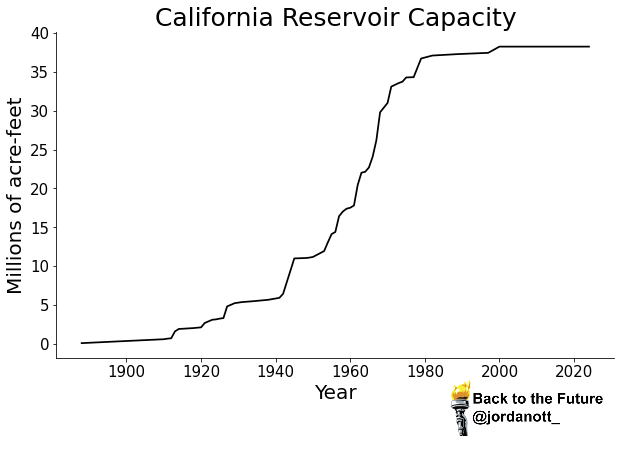

In [3]:
ax = sns.lineplot(x="Year", y="Capacity", data=cum_sum, color="black")
plt.ylabel("Millions of acre-feet")
plt.title("California Reservoir Capacity")

helper.add_logo(ax=ax)

helper.savefig("../images/california_reservoir_capacity")

### Deaths of Despair
All data can be found from [CDC WONDER](https://wonder.cdc.gov/)
- Suicide data pulled from [here](https://www.cdc.gov/suicide/suicide-data-statistics.html)  
- Drug overdoses pulled from [here](https://injuryfacts.nsc.org/home-and-community/safety-topics/drugoverdoses/data-details/) (2023 estimate given from [NPR](https://www.npr.org/2023/12/28/1220881380/overdose-fentanyl-drugs-addiction))

In [4]:
suicides = pd.read_csv("../raw_data/individual/deaths_of_despair/suicide.txt")
drug_overdoses = pd.read_csv("../raw_data/individual/deaths_of_despair/drug_overdoses.txt")
alcohol_deaths = pd.read_csv("../raw_data/individual/deaths_of_despair/alcohol_deaths.txt")

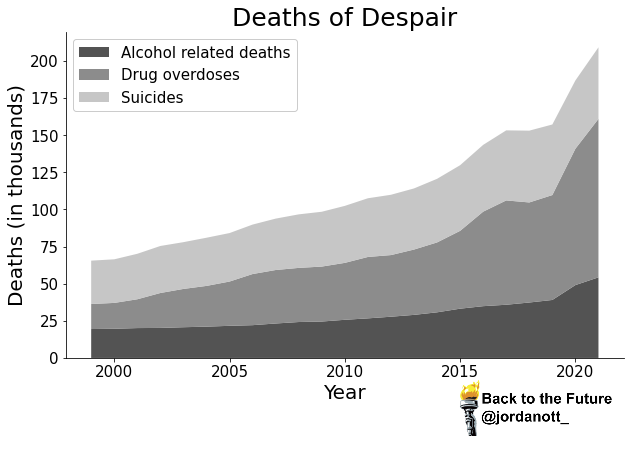

In [5]:
fig, ax = plt.subplots()

plt.stackplot(
    suicides.Year.values, 
    [
        alcohol_deaths["Alcohol related deaths"].values / 1_000, 
        drug_overdoses["Drug overdoses"].values / 1_000, 
        suicides["Suicides"].values / 1_000
    ], 
    labels=["Alcohol related deaths", "Drug overdoses", "Suicides"],
    alpha=0.9,
    colors=sns.color_palette("gray", 3)
)

plt.title("Deaths of Despair")
plt.xlabel("Year")
plt.ylabel("Deaths (in thousands)")

helper.add_logo(ax=ax)
helper.create_legend(loc="upper left")

helper.savefig("../images/deaths_of_despair")

## Education

### Degrees
Raw data pulled from [here](https://nces.ed.gov/programs/digest/d22/tables/dt22_318.20.asp)

In [6]:
degrees = pd.read_csv("../raw_data/individual/education/bachelors.txt")

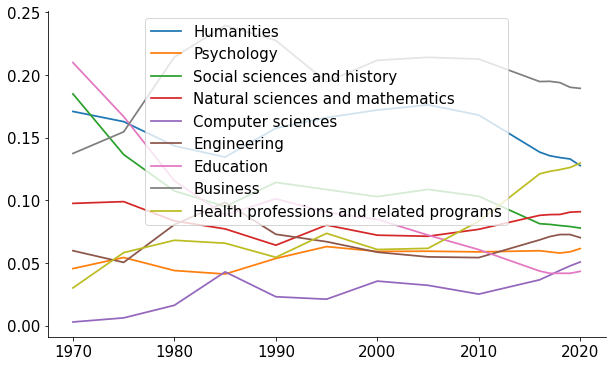

In [7]:
for name in degrees.columns[2:-1]:
    percent = degrees[name].values / degrees["Total degrees"].values
    plt.plot(degrees.Year.values, percent, label=name)

plt.legend()

In [8]:
degrees = pd.read_csv("../raw_data/individual/education/masters.txt")

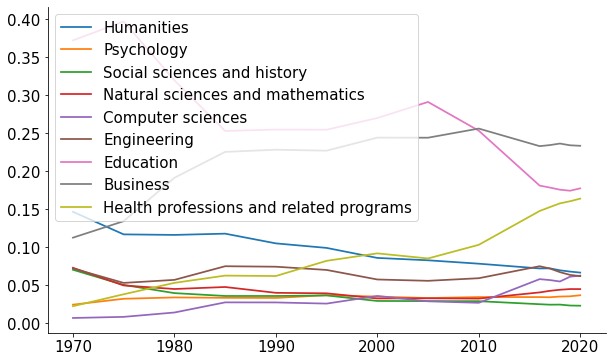

In [9]:
for name in degrees.columns[2:-1]:
    percent = degrees[name].values / degrees["Total degrees"].values
    plt.plot(degrees.Year.values, percent, label=name)

plt.legend()

In [10]:
degrees = pd.read_csv("../raw_data/individual/education/doctorates.txt")

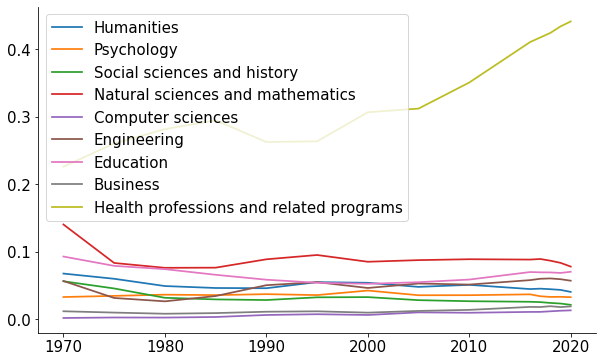

In [11]:
for name in degrees.columns[2:-1]:
    percent = degrees[name].values / degrees["Total degrees"].values
    plt.plot(degrees.Year.values, percent, label=name)

plt.legend()